In [19]:
from datasets import load_dataset

# Load GoEmotions dataset
dataset = load_dataset("go_emotions")

# Explore dataset splits
print(dataset)

# Example: view first row from training set
print(dataset["train"][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [20]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})


In [21]:
len(dataset["train"].features["labels"].feature.names)

28

In [22]:
dataset["train"].features["labels"].feature.names

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

In [23]:
dataset["train"]

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 43410
})

In [24]:
emotions=dataset["train"].features["labels"].feature.names

In [25]:
import random

In [26]:
for _ in range(5):
    idx = random.randint(0, len(dataset["train"]) - 1)  # pick random row
    row = dataset["train"][idx]
    text = row["text"]
    label_ids = row["labels"]  # list of label IDs (can be multiple)
    label_names = [emotions[i] for i in label_ids]  # map IDs to emotion names

    print("Text:", text)
    print("Emotion(s):", label_names)
    print("-" * 50)

Text: [NAME], stop being [NAME].
Emotion(s): ['disapproval']
--------------------------------------------------
Text: Fix their pay algorithm, the app, rating system, and hire more Dasher support representatives.
Emotion(s): ['neutral']
--------------------------------------------------
Text: That's true. But in the real human world, partners have a similar, if not the same, generational separation from their closest common ancestor. 
Emotion(s): ['neutral']
--------------------------------------------------
Text: Kinda hot tho
Emotion(s): ['neutral']
--------------------------------------------------
Text: oh my [NAME]
Emotion(s): ['surprise']
--------------------------------------------------


In [28]:
import pandas as pd

train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

print(train_df.head())


                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj


In [29]:
print(train_df['text'][0])
print(train_df['labels'][0])

My favourite food is anything I didn't have to cook myself.
[27]


In [30]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (43410, 3)
Validation shape: (5426, 3)
Test shape: (5427, 3)


In [33]:
print(train_df.sample(5))

                                                    text   labels       id
22173  But this is a 1v1 game with a couple thousand ...      [9]  edaakxg
20704    I’m finishing that right now. Very fascinating.   [0, 4]  eey7ols
2414   The dude was absent in the Ohio State game... ...  [9, 19]  eedxypu
21954              Feels good to be a Nets fan right now     [17]  efgzytj
3448                                       Oof that hurt      [9]  eeduiwo


In [34]:
train_df['num_labels'] = train_df['labels'].apply(len)
print(train_df['num_labels'].value_counts())

num_labels
1    36308
2     6541
3      532
4       28
5        1
Name: count, dtype: int64


In [35]:
train_df['dominant_emotion'] = train_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)
val_df['dominant_emotion'] = val_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)
test_df['dominant_emotion'] = test_df['labels'].apply(lambda x: x[0] if len(x) > 0 else -1)

In [36]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2
3,To make her feel threatened,[14],ed7ypvh,1,14
4,Dirty Southern Wankers,[3],ed0bdzj,1,3


In [37]:
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "grief", "joy", "love", "nervousness", "optimism",
    "pride", "realization", "relief", "remorse", "sadness", "surprise",
    "neutral"
]

In [38]:
train_df['emotion_name'] = train_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')
val_df['emotion_name'] = val_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')
test_df['emotion_name'] = test_df['dominant_emotion'].apply(lambda x: emotion_labels[x] if x>=0 else 'neutral')

In [41]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger
3,To make her feel threatened,[14],ed7ypvh,1,14,fear
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance


In [45]:
emotion_to_mood = {
    'admiration':'happy','amusement':'happy','approval':'happy','excitement':'happy',
    'joy':'happy','love':'happy','gratitude':'happy','pride':'happy','optimism':'happy',
    'sadness':'sad','grief':'sad','disappointment':'sad','remorse':'sad','disapproval':'sad','embarrassment':'sad',
    'anger':'angry','annoyance':'angry','disgust':'angry',
    'fear':'calm','nervousness':'calm','relief':'calm','curiosity':'calm',
    'caring':'calm','realization':'calm','desire':'calm','surprise':'calm','neutral':'calm', 'confusion': 'calm'
}

In [46]:
train_df['mood'] = train_df['emotion_name'].apply(lambda x: emotion_to_mood[x])
val_df['mood'] = val_df['emotion_name'].apply(lambda x: emotion_to_mood[x])
test_df['mood'] = test_df['emotion_name'].apply(lambda x: emotion_to_mood[x])

In [47]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name,mood
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral,calm
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral,calm
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger,angry
3,To make her feel threatened,[14],ed7ypvh,1,14,fear,calm
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance,angry


In [49]:
print(train_df['mood'].value_counts())

mood
calm     19532
happy    15343
sad       4270
angry     4265
Name: count, dtype: int64


In [50]:
print(train_df['text'].isnull().sum())

0


In [51]:
print(test_df['text'].isnull().sum())

0


In [52]:
print(val_df['text'].isnull().sum())

0


In [53]:
train_df['text_length'] = train_df['text'].apply(len)
print(train_df['text_length'].describe())

count    43410.000000
mean        68.400875
std         36.721898
min          2.000000
25%         38.000000
50%         65.000000
75%         96.000000
max        703.000000
Name: text_length, dtype: float64


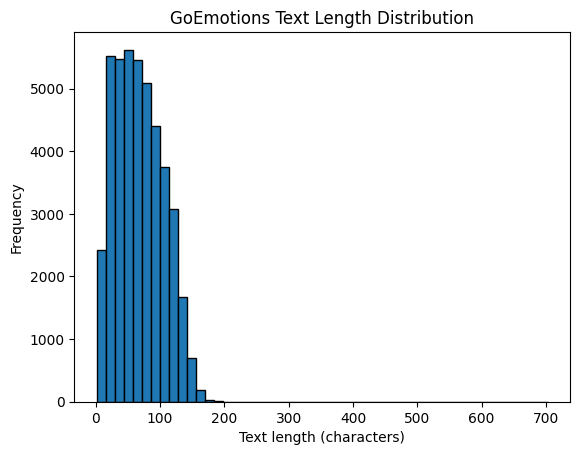

In [54]:
import matplotlib.pyplot as plt

plt.hist(train_df['text_length'], bins=50, edgecolor='black')
plt.xlabel("Text length (characters)")
plt.ylabel("Frequency")
plt.title("GoEmotions Text Length Distribution")
plt.show()

In [56]:
val_df['text_length'] = val_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)
train_df = train_df[train_df['text_length'] >= 3]
val_df = val_df[val_df['text_length'] >= 3]
test_df = test_df[test_df['text_length'] >= 3]

In [57]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (43408, 8)
Validation shape: (5426, 7)
Test shape: (5427, 7)


In [60]:
train_df.columns

Index(['text', 'labels', 'id', 'num_labels', 'dominant_emotion',
       'emotion_name', 'mood', 'text_length'],
      dtype='object')

In [62]:
train_df.head()

,text,labels,id,num_labels,dominant_emotion,emotion_name,mood,text_length
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,27,neutral,calm,59
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,27,neutral,calm,112
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,2,anger,angry,30
3,To make her feel threatened,[14],ed7ypvh,1,14,fear,calm,27
4,Dirty Southern Wankers,[3],ed0bdzj,1,3,annoyance,angry,22


In [61]:
test_df.columns

Index(['text', 'labels', 'id', 'dominant_emotion', 'emotion_name', 'mood',
       'text_length'],
      dtype='object')

In [63]:
test_df.head()

,text,labels,id,dominant_emotion,emotion_name,mood,text_length
0,I’m really sorry about your situation :( Altho...,[25],eecwqtt,25,sadness,sad,99
1,It's wonderful because it's awful. At not with.,[0],ed5f85d,0,admiration,happy,47
2,"Kings fan here, good luck to you guys! Will be...",[13],een27c3,13,excitement,happy,77
3,"I didn't know that, thank you for teaching me ...",[15],eelgwd1,15,gratitude,happy,62
4,They got bored from haunting earth for thousan...,[27],eem5uti,27,neutral,calm,99


In [64]:
train_df = train_df.drop(columns=["num_labels"])

In [65]:
print("Train duplicates:", train_df.duplicated(subset=["text"]).sum())
print("Validation duplicates:", val_df.duplicated(subset=["text"]).sum())
print("Test duplicates:", test_df.duplicated(subset=["text"]).sum())


Train duplicates: 183
Validation duplicates: 3
Test duplicates: 6


In [66]:
dupes = train_df[train_df.duplicated(subset=["text"], keep=False)]
dupes.sort_values("text").head(20)

,text,labels,id,dominant_emotion,emotion_name,mood,text_length
1030,"A surprise to be sure, but a welcome one.",[20],eeo9eeh,20,optimism,happy,41
41866,"A surprise to be sure, but a welcome one.",[13],edwu7dp,13,excitement,happy,41
22935,"A surprise to be sure, but a welcome one.",[26],edgjk3k,26,surprise,calm,41
16095,Amen to that!,[4],ed7tfmt,4,approval,happy,13
37409,Amen to that!,[27],eerourf,27,neutral,calm,13
26898,Anytime :),[27],edget3c,27,neutral,calm,10
891,Anytime :),[27],eelce7s,27,neutral,calm,10
27042,Are you serious?,"[6, 7]",eezlyf8,6,confusion,calm,16
30285,Are you serious?,[7],ee9m45v,7,curiosity,calm,16
8434,Are you serious?,[7],edfbj9s,7,curiosity,calm,16


In [68]:
train_df = train_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)
val_df   = val_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)
test_df  = test_df.drop_duplicates(subset=["text", "mood"]).reset_index(drop=True)


In [69]:
def resolve_conflicts(df):
    return (
        df.groupby("text")["mood"]
          .agg(lambda x: x.value_counts().index[0])  # pick majority label
          .reset_index()
    )

train_df = resolve_conflicts(train_df)
val_df   = resolve_conflicts(val_df)
test_df  = resolve_conflicts(test_df)


In [70]:
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


Train: (43225, 2)
Validation: (5423, 2)
Test: (5421, 2)


In [71]:
print("Train duplicates left:", train_df.duplicated(subset=["text"]).sum())
print("Val duplicates left:", val_df.duplicated(subset=["text"]).sum())
print("Test duplicates left:", test_df.duplicated(subset=["text"]).sum())

Train duplicates left: 0
Val duplicates left: 0
Test duplicates left: 0


In [72]:
print(train_df["mood"].value_counts())


mood
calm     19473
happy    15239
sad       4258
angry     4255
Name: count, dtype: int64


In [73]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already done
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocess a single text string:
    1. Lowercase
    2. Strip leading/trailing whitespace
    3. Remove URLs and mentions
    4. Remove special characters
    5. Replace multiple spaces with single space
    6. Lemmatize each word
    """
    if not isinstance(text, str):
        return ""

    # Lowercase and strip
    text = text.lower().strip()

    # Remove URLs (http://, https://) and www links
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove special characters, keep letters and numbers
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Lemmatize words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [74]:
train_df['text'] = train_df['text'].apply(preprocess_text)
val_df['text']   = val_df['text'].apply(preprocess_text)
test_df['text']  = test_df['text'].apply(preprocess_text)

In [75]:
train_df = train_df[train_df['text'] != ''].reset_index(drop=True)
val_df   = val_df[val_df['text'] != ''].reset_index(drop=True)
test_df  = test_df[test_df['text'] != ''].reset_index(drop=True)

In [76]:
train_df.head()

,text,mood
0,if you dont wear brown and orangeyou dont matt...,angry
1,what do scottish people look like how i would ...,calm
2,a surprise to be sure but a welcome one,calm
3,pray v to ask that the law of the universe be ...,calm
4,itll get invaded by tankie unfortunately how a...,calm


In [77]:
print(train_df['text'].str.islower().all())  # Should return True if all text is lowercase

True


In [78]:
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)

Train: (43222, 2)
Validation: (5423, 2)
Test: (5421, 2)


In [79]:
urls_mentions = train_df['text'].str.contains(r'http|www|@')
print("Rows with URLs or mentions:", urls_mentions.sum())  # Should be 0


Rows with URLs or mentions: 0


In [80]:
special_chars = train_df['text'].str.contains(r'[^a-z0-9\s]')
print("Rows with special characters:", special_chars.sum())  # Should be 0


Rows with special characters: 0


In [81]:
extra_spaces = train_df['text'].str.contains(r'\s{2,}')
print("Rows with multiple spaces:", extra_spaces.sum())  # Should be 0


Rows with multiple spaces: 0


In [82]:
# Example: check a few known words
sample = "running cats flying"
print("Original:", sample)
print("Lemmatized:", ' '.join([lemmatizer.lemmatize(w) for w in sample.split()]))


Original: running cats flying
Lemmatized: running cat flying


In [83]:
empty_rows = (train_df['text'] == '').sum()
print("Empty rows:", empty_rows)  # Should be 0


Empty rows: 0


In [84]:
from transformers import AutoTokenizer

# Load pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example text
text = "I love music!"

# Tokenize
encoded = tokenizer(
    text,
    padding='max_length',  # pad sequences to max length
    truncation=True,       # truncate if too long
    max_length=64,         # max tokens per sentence
    return_tensors='pt'    # return PyTorch tensors
)

print(encoded)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 1045, 2293, 2189,  999,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [85]:
# Tokenize entire dataset
train_encodings = tokenizer(list(train_df['text']), truncation=True, padding=True, max_length=128)
val_encodings   = tokenizer(list(val_df['text']), truncation=True, padding=True, max_length=128)
test_encodings  = tokenizer(list(test_df['text']), truncation=True, padding=True, max_length=128)


In [86]:
train_df.to_csv("train_cleaned.csv", index=False)
val_df.to_csv("val_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

In [87]:
import pickle

with open("train_encodings.pkl", "wb") as f:
    pickle.dump(train_encodings, f)

with open("val_encodings.pkl", "wb") as f:
    pickle.dump(val_encodings, f)

with open("test_encodings.pkl", "wb") as f:
    pickle.dump(test_encodings, f)
